# MÉTODOS DESARROLLADOS

Metodos de Krilov

In [ ]:
def is_symmetric(matrix):
  return np.array_equal(matrix, matrix.T)

# Gradiente conjugado
#es un método numérico para resolver sistemas de ecuaciones lineales, 
#especialmente para aquellos que tienen una matriz simétrica y definida 
#positivamente.

def gradiente_conjugado(A,b,iteraciones):

  if is_symmetric(A) == False:
    return crearVector(malla)

  n = len(b)
  x = iteraciones
  r = b - np.dot(A,x)
  p = r.copy()
  r_k_norm = np.dot(r,r)
 

  for i in range(n):
    Ap = np.dot(A, p)
    alpha = r_k_norm / np.dot(p, Ap)
    x += alpha * p
    r += alpha * Ap
    r_kplus1_norm = np.dot(r, r)
    beta = r_kplus1_norm / r_k_norm
    p = r + beta * p
    r_k_norm = r_kplus1_norm
    print("[GRADIENTE CONJUGADO]", i)
         
 
  solucion = []
  contador = 0

  for j in range(x.shape[0]):
     for k in range(x.shape[1]):
       solucion.append(x[j][k])
       
  
  return solucion

  
# Gradiente descendente
#e utiliza para encontrar el mínimo de una función de costo. En el caso de 
#sistemas lineales, la función de costo es el error cuadrático entre el lado 
#derecho y el lado izquierdo de la ecuación. 

def gradiente_descendente_con_relajacion(A, b, iteraciones, relaxation_factor):
  if is_symmetric(A) == False:
    return crearVector(malla)

  m = len(A)
  toler = 0.01
  A_transpose = A.transpose()
  theta= crearVector(malla)
  for i in range(0, iteraciones):
    xold = np.copy(theta)
    hipot = np.dot(A, theta)
    perdida = hipot - b
    costo = np.sum(perdida ** 2) / (2 * m)
    gradiente = np.dot(A_transpose , perdida) / m
    theta = theta - toler * relaxation_factor * gradiente
    diff=np.linalg.norm(abs(xold))-np.linalg.norm(abs(theta))
    print("[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA", diff)
  return theta

Metodos de cholevski

In [ ]:
#Metodo de descomposición Cholevski, pero no tiene tolerancia 
#Richardson, se define cuando Q= Identidad de A, la formula general es: 
#X(k)= (I-Q^(-1)A)X(k-1) + Q^(-1)b

#I= identidad 
#Q= Identidad

def richardsonCho(A,b, relax, iteraciones):
  x0= crearVector(malla)
  identidad= np.identity(contarIncognitas(malla))
  inversaQ=np.linalg.inv(identidad)

  norma= np.linalg.norm(identidad-inversaQ*A) #Determinar si hay convergencia
  
  if norma<=1:
    for i in range(0, iteraciones):
      xold = np.copy(x0)
      solucion= np.dot((identidad-np.dot(inversaQ,A)),x0) + np.dot(inversaQ,b)
      diff=np.linalg.norm(abs(xold))-np.linalg.norm(abs(solucion))
      print("[RICHARDSON CHO] NORMA", diff)
      if(diff < toler):
        print("[RICHARDSON CHO] El método converge en la iteración: ", i)
        break;

      x0 = solucion * relax + xold * (1 - relax)
      
  solucion[solucion<0] = 0
  return solucion

#Metodo de descomposición Cholevski, pero no tiene tolerancia 
#Gauss seidel, se define cuando Q= Matriz triangular de A, la formula general es: 
#X(k)= (I-Q^(-1)A)X(k-1) + Q^(-1)b

#I= identidad 
#Q= triangular inferior de A

def gaussChoRelajacion(A, b, iteraciones, relax, type = "u"): 
  x0= 0

  if type == "u":
    x0 = crearVector(malla)
  else:
    x0 = crearVector(malla)
  inversaQ=np.linalg.inv(np.tril(A)) 
  identidad= np.identity(contarIncognitas(malla))
  norma= np.linalg.norm(identidad-inversaQ*A)  #Determinar si hay convergencia
  #solucion = x0

  #if norma<=1:
  for i in range(0, iteraciones):
      xold = np.copy(x0)
      solucion = np.dot((identidad-np.dot(inversaQ,A)),x0) + np.dot(inversaQ,b)
      diff=np.linalg.norm(abs(xold))-np.linalg.norm(abs(solucion))
      print("[SEIDEL CHO] NORMA", diff)
      
      if(diff < toler):
        print("[SEIDEL CHO] El método converge en la iteración: ", i)
        break;

      x0 = solucion * relax + xold * (1 - relax)
      #print(x0)
  solucion[solucion<0] = 0
  return solucion

#Metodo de descomposición Cholevski, pero no tiene tolerancia 
#Jacobi, se define cuando Q= Matriz diagonal de A, la formula general es: 
#X(k)= (I-Q^(-1)A)X(k-1) + Q^(-1)b

#I= identidad 
#Q= Diagonal de A

def jacobiCho(A,b, relax, iteraciones):
  x0= crearVector(malla)
  inversaQ=np.linalg.inv(np.diagflat(np.diag(A)))
  identidad= np.identity(contarIncognitas(malla))

  norma= np.linalg.norm(identidad-inversaQ*A)  #Determinar si hay convergencia
  if norma<=1:
    for i in range(0, iteraciones):
      xold = np.copy(x0)
      solucion= np.dot((identidad-np.dot(inversaQ,A)),x0) + np.dot(inversaQ,b)
      diff=np.linalg.norm(abs(xold))-np.linalg.norm(abs(solucion))
      print("[JACOBI CHO] NORMA", diff)
      
      if(diff < toler):
        print("[JACOBI CHO] El método converge en la iteración: ", i)
        break;

      x0 = solucion * relax + xold * (1 - relax)
  solucion[solucion<0] = 0
  return solucion

# CONDICIONES INICIALES

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

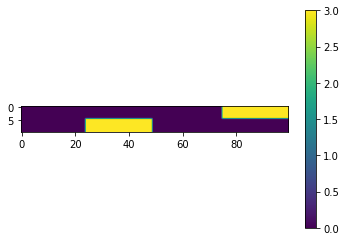

W


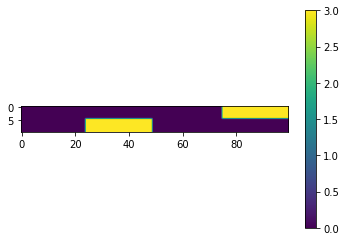

In [ ]:
#Para iniciar, se debe tener en cuenta la realización de las vigas de la malla, sin importar el tamaño o las posiciones
#de las vigas, la función debe generarlas, con un color distinto para diferenciarlas(con un valor de 3) y determinar que efectivamente fueron creadas. 

import matplotlib.pyplot as plt;
import matplotlib.pylab as p;
import numpy as np;
import math;
import seaborn as sns;
from mpl_toolkits . mplot3d import Axes3D ;


# Distancia entre puntos
h = 1

#Filas
xmax = 10

#Columnas
ymax = 100

# Viga 1
inicio = 25
alto1 = 5
ancho1 = 25

# Viga 2
inicio2 = 76
alto2 = 5
ancho2 = 25

# Velocidad inicial
velocidadInicial=1

#tolerancia
toler = 0.01

#relajacion
relajacion= 1.1

malla= np.zeros((xmax, ymax))
w = np.zeros((xmax, ymax))
z = np.zeros((xmax, ymax))


def viga1():
  for i in range(xmax-alto1, xmax):
    for j in range(inicio-1, (inicio-1)+ancho1):
        malla[i,j] = 3
        w[i,j] = 3

def viga2():
  for i in range(0, alto2):
    for j in range(inicio2-1, (inicio2-1)+ancho2):
        malla[i,j] = 3
        w[i,j] = 3

viga1()
viga2()

print(malla)
print(w)

#Pintar la malla en un grafico 
plt.imshow(malla)
plt.colorbar()
plt.show()
print("W")
plt.imshow(w)
plt.colorbar()
plt.show()

In [ ]:
#Luego se deben establecer las condiciones de frontera, de la linea superior, izquieda, abajo, derecha y las vigas, fueron almacenadas en un diccionario 
#para luego determinar qué espacios eran incognitas y qué espacios eran fronteras 

def dictCondicionesFrontera(malla):
  valor=0
  fronteras= dict()
  filas= malla.shape[0]
  columnas= malla.shape[1]

  fronteras["a"+ str(0) + "." + str(0)]= 0
  fronteras["a"+ str(xmax-1) + "." + str(0)]= 0
  
  #Viga1
  for i in range(xmax-alto1, xmax):
    for j in range(inicio-1, (inicio-1)+ancho1):
      fronteras["a"+ str(i) + "." + str(j)]= 0

  #Viga 2
  for p in range(0, alto2):
    for h in range(inicio2-1, (inicio2-1)+ancho2):
      fronteras["a"+ str(p) + "." + str(h)]= 0

   #Primer columna V0
  for w in range(xmax):
    clave= "a"+ str(w) + "." + str(0)
    if clave not in fronteras:
       fronteras["a"+ str(w) + "." + str(0)]= velocidadInicial
  
  #Linea superior
  for k in range(0, ymax):
    clave= "a"+ str(0) + "." + str(k)
    if clave not in fronteras:  #Si la clave no está en el diccionario, es decir si no está almacenada como frontera. 
      fronteras["a"+ str(0) + "." + str(k)]= 0

  #Abajo 
  for r in range(0,ymax):
    clave= "a"+ str(xmax-1) + "." + str(r)
    if clave not in fronteras:
      fronteras["a"+ str(xmax-1) + "." + str(r)]= 0

  #Derecha 
  for l in range(0,xmax):
    clave= "a"+ str(l) + "." + str(ymax-1)
    if clave not in fronteras:
      fronteras["a"+ str(l) + "." + str(ymax-1)]= 0

  return fronteras

dictCondicionesFrontera(malla)

{'a0.0': 0,
 'a9.0': 0,
 'a5.24': 0,
 'a5.25': 0,
 'a5.26': 0,
 'a5.27': 0,
 'a5.28': 0,
 'a5.29': 0,
 'a5.30': 0,
 'a5.31': 0,
 'a5.32': 0,
 'a5.33': 0,
 'a5.34': 0,
 'a5.35': 0,
 'a5.36': 0,
 'a5.37': 0,
 'a5.38': 0,
 'a5.39': 0,
 'a5.40': 0,
 'a5.41': 0,
 'a5.42': 0,
 'a5.43': 0,
 'a5.44': 0,
 'a5.45': 0,
 'a5.46': 0,
 'a5.47': 0,
 'a5.48': 0,
 'a6.24': 0,
 'a6.25': 0,
 'a6.26': 0,
 'a6.27': 0,
 'a6.28': 0,
 'a6.29': 0,
 'a6.30': 0,
 'a6.31': 0,
 'a6.32': 0,
 'a6.33': 0,
 'a6.34': 0,
 'a6.35': 0,
 'a6.36': 0,
 'a6.37': 0,
 'a6.38': 0,
 'a6.39': 0,
 'a6.40': 0,
 'a6.41': 0,
 'a6.42': 0,
 'a6.43': 0,
 'a6.44': 0,
 'a6.45': 0,
 'a6.46': 0,
 'a6.47': 0,
 'a6.48': 0,
 'a7.24': 0,
 'a7.25': 0,
 'a7.26': 0,
 'a7.27': 0,
 'a7.28': 0,
 'a7.29': 0,
 'a7.30': 0,
 'a7.31': 0,
 'a7.32': 0,
 'a7.33': 0,
 'a7.34': 0,
 'a7.35': 0,
 'a7.36': 0,
 'a7.37': 0,
 'a7.38': 0,
 'a7.39': 0,
 'a7.40': 0,
 'a7.41': 0,
 'a7.42': 0,
 'a7.43': 0,
 'a7.44': 0,
 'a7.45': 0,
 'a7.46': 0,
 'a7.47': 0,
 'a7.48': 0,
 

In [ ]:
#Luego se deben establecer las condiciones de frontera, de la linea superior, izquieda, abajo, derecha y las vigas, fueron almacenadas en un diccionario 
#para luego determinar qué espacios eran incognitas y qué espacios eran fronteras 

def dictIncognitasW(malla):
  valor=0
  incognitasW= { "back": {}, "front": {}, "top": {}, "bottom": {} }
  fronteras = dictCondicionesFrontera(malla)
  filas= malla.shape[0]
  columnas= malla.shape[1]

  #Beam front D
  for i in range(1, xmax-1):
    clave1= "a"+ str(i) + "." + str(inicio-1)
    clave2= "a"+ str(i) + "." + str(inicio2-1)
    if clave1 in fronteras:
      incognitasW["a"+ str(i) + "." + str(inicio-2)] = 0
      incognitasW["front"]["a"+ str(i) + "." + str(inicio-2)] = 0
    if clave2 in fronteras:
      incognitasW["a"+ str(i) + "." + str(inicio2-2)]= 0
      incognitasW["front"]["a"+ str(i) + "." + str(inicio2-2)] = 0

  #Beam back B
  for i in range(1, xmax-1):
    clave1= "a"+ str(i) + "." + str((inicio+ancho1)-2)
    if clave1 in fronteras:
      incognitasW["a"+ str(i) + "." + str((inicio+ancho1)-1)]= 0
      incognitasW["back"]["a"+ str(i) + "." + str((inicio+ancho1)-1)] = 0

  #Beam top C
  for j in range(1, ymax-1):
    clave1= "a"+ str(xmax-alto1) + "." + str(j)
    if clave1 in fronteras:
      incognitasW["a"+ str((xmax-alto1)-1) + "." + str(j)]= 0
      incognitasW["top"]["a"+ str((xmax-alto1)-1) + "." + str(j)]= 0

  #Beam bottom
  for j in range(1, ymax-1):
    clave1= "a"+ str((0+alto2)-1) + "." + str(j)
    if clave1 in fronteras:
      incognitasW["a"+ str((0+alto2)) + "." + str(j)]= 0
      incognitasW["bottom"]["a"+ str((0+alto2)) + "." + str(j)]= 0

  return incognitasW

dictIncognitasW(malla)

{'back': {'a5.49': 0, 'a6.49': 0, 'a7.49': 0, 'a8.49': 0},
 'front': {'a1.74': 0,
  'a2.74': 0,
  'a3.74': 0,
  'a4.74': 0,
  'a5.23': 0,
  'a6.23': 0,
  'a7.23': 0,
  'a8.23': 0},
 'top': {'a4.24': 0,
  'a4.25': 0,
  'a4.26': 0,
  'a4.27': 0,
  'a4.28': 0,
  'a4.29': 0,
  'a4.30': 0,
  'a4.31': 0,
  'a4.32': 0,
  'a4.33': 0,
  'a4.34': 0,
  'a4.35': 0,
  'a4.36': 0,
  'a4.37': 0,
  'a4.38': 0,
  'a4.39': 0,
  'a4.40': 0,
  'a4.41': 0,
  'a4.42': 0,
  'a4.43': 0,
  'a4.44': 0,
  'a4.45': 0,
  'a4.46': 0,
  'a4.47': 0,
  'a4.48': 0},
 'bottom': {'a5.75': 0,
  'a5.76': 0,
  'a5.77': 0,
  'a5.78': 0,
  'a5.79': 0,
  'a5.80': 0,
  'a5.81': 0,
  'a5.82': 0,
  'a5.83': 0,
  'a5.84': 0,
  'a5.85': 0,
  'a5.86': 0,
  'a5.87': 0,
  'a5.88': 0,
  'a5.89': 0,
  'a5.90': 0,
  'a5.91': 0,
  'a5.92': 0,
  'a5.93': 0,
  'a5.94': 0,
  'a5.95': 0,
  'a5.96': 0,
  'a5.97': 0,
  'a5.98': 0},
 'a1.74': 0,
 'a2.74': 0,
 'a3.74': 0,
 'a4.74': 0,
 'a5.23': 0,
 'a6.23': 0,
 'a7.23': 0,
 'a8.23': 0,
 'a5.49': 

In [ ]:
#Establece las condiciones de frontera en la malla 

def definirCondicionesDeBorde(malla):
  filas = malla.shape[0]
  columnas = malla.shape[1]
  diccionarioFronteras= dictCondicionesFrontera(malla)
  for i in range(0,filas):
    for j in range(0,columnas):
      clave= "a"+ str(i) + "." + str(j)
      if clave in  diccionarioFronteras:
        malla[i,j] =  diccionarioFronteras["a"+ str(i) + "." + str(j)]
  return malla

def definirCondicionesDeBordeW(malla):
  filas = malla.shape[0]
  columnas = malla.shape[1]
  diccionarioFronteras= dictCondicionesFrontera(malla)
  for i in range(0,filas):
    for j in range(0,columnas):
      clave= "a"+ str(i) + "." + str(j)
      if clave in  diccionarioFronteras:
        malla[i,j] = 0
  return malla

definirCondicionesDeBorde(malla)
definirCondicionesDeBordeW(w)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [ ]:
#Esta función cuenta la cantidad de incognitas que hay en la malla
def contarIncognitas(malla):
  filas = malla.shape[0]
  columnas = malla.shape[1]
  contador = 0
  diccionarioFronteras= dictCondicionesFrontera(malla)
  for i in range(filas):
    for j in range(columnas):
      clave= "a"+ str(i) + "." + str(j)
      if clave not in diccionarioFronteras:
        contador+=1

  return contador
contarIncognitas(malla)

#Establece un diccionario donde estarán almacenados los espacios que son incognitas y deben encontrarse.
def dictIncognitas(malla):
 diccionarioFronteras= dictCondicionesFrontera(malla)
 incognitas= dict()
 conteo = 0
 
 for i in range(malla.shape[0]):
    for j in range(malla.shape[1]):
      clave= "a"+ str(i) + "." + str(j)
      if clave not in diccionarioFronteras:
        incognitas["a"+ str(i) + "." + str(j)]= conteo
        conteo+=1

 return incognitas
dictIncognitas(malla)

{'a1.1': 0,
 'a1.2': 1,
 'a1.3': 2,
 'a1.4': 3,
 'a1.5': 4,
 'a1.6': 5,
 'a1.7': 6,
 'a1.8': 7,
 'a1.9': 8,
 'a1.10': 9,
 'a1.11': 10,
 'a1.12': 11,
 'a1.13': 12,
 'a1.14': 13,
 'a1.15': 14,
 'a1.16': 15,
 'a1.17': 16,
 'a1.18': 17,
 'a1.19': 18,
 'a1.20': 19,
 'a1.21': 20,
 'a1.22': 21,
 'a1.23': 22,
 'a1.24': 23,
 'a1.25': 24,
 'a1.26': 25,
 'a1.27': 26,
 'a1.28': 27,
 'a1.29': 28,
 'a1.30': 29,
 'a1.31': 30,
 'a1.32': 31,
 'a1.33': 32,
 'a1.34': 33,
 'a1.35': 34,
 'a1.36': 35,
 'a1.37': 36,
 'a1.38': 37,
 'a1.39': 38,
 'a1.40': 39,
 'a1.41': 40,
 'a1.42': 41,
 'a1.43': 42,
 'a1.44': 43,
 'a1.45': 44,
 'a1.46': 45,
 'a1.47': 46,
 'a1.48': 47,
 'a1.49': 48,
 'a1.50': 49,
 'a1.51': 50,
 'a1.52': 51,
 'a1.53': 52,
 'a1.54': 53,
 'a1.55': 54,
 'a1.56': 55,
 'a1.57': 56,
 'a1.58': 57,
 'a1.59': 58,
 'a1.60': 59,
 'a1.61': 60,
 'a1.62': 61,
 'a1.63': 62,
 'a1.64': 63,
 'a1.65': 64,
 'a1.66': 65,
 'a1.67': 66,
 'a1.68': 67,
 'a1.69': 68,
 'a1.70': 69,
 'a1.71': 70,
 'a1.72': 71,
 'a1.73': 7

In [ ]:
#Crear vector inicial con cada incgonita disminuida en 0.01 
#Se rellena por cada columna, ya que la columna va disminuyendo la velocidad
def crearVector(malla):
  inicial=velocidadInicial

  incognitas=dictIncognitas(malla)

  x= np.zeros(contarIncognitas(malla))
  contador=0

  for i in range(0,malla.shape[1]):
    for k in range(0,malla.shape[0]):
      clave= "a"+ str(k) + "." + str(i)

      if clave in incognitas:
        if inicial > 0:
          incognitas["a"+ str(k) + "." + str(i)]= inicial
        else: 
          incognitas["a"+ str(k) + "." + str(i)]= 0
    inicial+=-0.01



  for uno in range(0,malla.shape[0]):
    for dos in range(0,malla.shape[1]):
      clave= "a"+ str(uno) + "." + str(dos)
      if clave in incognitas:

          x[contador]= incognitas[clave]
          contador+=1
  
  return x

print(crearVector(malla))

#Crear vector inicial con cada incgonita disminuida en 0.01 
#Se rellena por cada columna, ya que la columna va disminuyendo la velocidad
def crearVectorW(malla):
  inicial=velocidadInicial

  incognitas=dictIncognitas(malla)
  incognitasW=dictIncognitasW(malla)

  x= np.zeros(contarIncognitas(malla))
  contador=0

  for i in range(0,malla.shape[1]):
    for k in range(0,malla.shape[0]):
      clave= "a"+ str(k) + "." + str(i)

      if clave in incognitasW:
        if  clave in incognitasW["back"]:
          x[contador] = -2 * (malla[k][i+1] - malla[k][i])
        if  clave in incognitasW["front"]:
          x[contador] = -2 * (malla[k][i-1] - malla[k][i])
        if  clave in incognitasW["top"]:
          x[contador] = -2 * (malla[k-1][i] - malla[k][i])
        if  clave in incognitasW["bottom"]:
          x[contador] = -2 * (malla[k+1][i] - malla[k][i])
      
      if clave in incognitas:
        contador+=1
  
  return x

print(crearVectorW(malla))

[0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58
 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45 0.44
 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31 0.3
 0.29 0.28 0.27 0.26 0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9
 0.89 0.88 0.87 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76
 0.75 0.74 0.73 0.72 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62
 0.61 0.6  0.59 0.58 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48
 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34
 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.99 0.98 0.97 0.96 0.95 0.94
 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86 0.85 0.84 0.83 0.82 0.81 0.8
 0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72 0.71 0.7  0.69 0.68 0.67 0.66
 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58 0.57 0.56 0.55 0.54 0.53 0.52
 0.51 0.5

In [ ]:
def rellenarMatriz(malla,metodo):
  matrizSolucion= np.array(metodo)
  conteo=0
  filas= malla.shape[0]
  columnas= malla.shape[1]
  diccionarioIncognitas=dictIncognitas(malla)

  for fila in range(filas):
      for columna in range(columnas):
        clave= "a"+ str(fila) + "." + str(columna)
        
        if clave in diccionarioIncognitas:
           malla[fila][columna]=matrizSolucion[conteo]
           conteo+=1

  return malla

def pintarMatriz(malla):
    plt.imshow(malla)
    plt.colorbar()
    plt.show()

# SOLUCION DE SISTEMA DE ECUACIONES LINEALES

***Solución del sistema lineal con la ecuación despejada***

In [ ]:
#Determinar matriz A lineal 
def matricesAb(malla):
  diccionarioIncognitas= dictIncognitas(malla)
  diccionarioFronteras= dictCondicionesFrontera(malla)
  matrizA= np.zeros((contarIncognitas(malla), contarIncognitas(malla)))
  matrizB= np.clip(np.zeros(contarIncognitas(malla)),-1/8, -1/8)
  contadorFilas=0

  for i in range(malla.shape[0]):

     for j in range(malla.shape[1]):
      llave= "a"+ str(i) + "." + str(j)
      if llave not in diccionarioFronteras:

        #Establecer diagonal
        matrizA[contadorFilas][diccionarioIncognitas[llave]]=1

        #Establecer valor de la derecha
        llaveDerecha="a"+ str(i) + "." + str(j+1)
        if llaveDerecha in diccionarioFronteras:
          matrizB[contadorFilas] += (malla[i][j+1]/4)
        else:
          matrizA[contadorFilas][diccionarioIncognitas[llaveDerecha]]=(-1/4)

        #Establecer valor de la izquierda
        llaveIzquierda="a"+ str(i) + "." + str(j-1)
        if llaveIzquierda in diccionarioFronteras:
          matrizB[contadorFilas] += (malla[i][j-1]/4)
        else:
         matrizA[contadorFilas][diccionarioIncognitas[llaveIzquierda]]=(-1/4)

       #Establecer valor de abajo
        llaveAbajo="a"+ str(i+1) + "." + str(j)
        if  llaveAbajo in diccionarioFronteras:
          matrizB[contadorFilas] += (malla[i+1][j]/4)
        else:
          matrizA[contadorFilas][diccionarioIncognitas[llaveAbajo]]=(-1/4)

        #Establecer valor de arriba
        llaveArriva = i
        if (i-1 >= 0):
          llaveArriba="a"+ str(i-1) + "." + str(j)
        else:
          llaveArriba="a"+ str(0) + "." + str(j)
        
        if llaveArriba in diccionarioFronteras:
          matrizB[contadorFilas] += (malla[i-1][j]/4)
        else:
          matrizA[contadorFilas][diccionarioIncognitas[llaveArriba]]=(-1/4)

        contadorFilas+=1

  

  return matrizA, matrizB.T




In [ ]:
matrizA, matrizb= matricesAb(malla)
rellenarMatriz(malla, crearVector(malla))

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
        0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
        0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
        0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
        0.56, 0.55, 0.5

# MÉTODOS ITERATIVOS PARA RESOLVER SISTEMA LINEAL

**Descomposición de Cholesky (Gauss)**

[SEIDEL CHO] NORMA 6.154191812260692
[SEIDEL CHO] NORMA 2.2929418519047715
[SEIDEL CHO] NORMA -2.4188741847241753
[SEIDEL CHO] El método converge en la iteración:  2


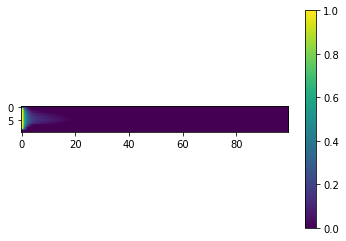

In [ ]:
sol = gaussChoRelajacion(matrizA, matrizb, 10, relajacion)
rellenarMatriz(malla, sol)
pintarMatriz(malla)

**Descomposición de Cholesky (Jacobi)**

[JACOBI CHO] NORMA 3.62740925343366
[JACOBI CHO] NORMA 2.70355254662252
[JACOBI CHO] NORMA 1.7086270824940595
[JACOBI CHO] NORMA 0.2657782172590277
[JACOBI CHO] NORMA -1.0592328773086805
[JACOBI CHO] El método converge en la iteración:  4


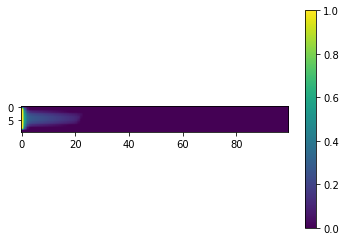

In [ ]:
jacobi = jacobiCho(matrizA, matrizb,relajacion,10)
rellenarMatriz(malla, jacobi)
pintarMatriz(malla)

**Descomposición de Cholesky (Richardson)**

[RICHARDSON CHO] NORMA 3.62740925343366
[RICHARDSON CHO] NORMA 2.70355254662252
[RICHARDSON CHO] NORMA 1.7086270824940595
[RICHARDSON CHO] NORMA 0.2657782172590277
[RICHARDSON CHO] NORMA -1.0592328773086805
[RICHARDSON CHO] El método converge en la iteración:  4


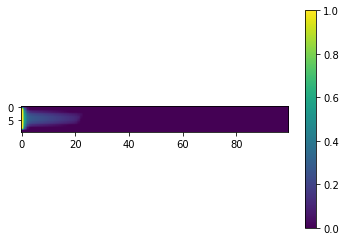

In [ ]:
richardson = richardsonCho(matrizA, matrizb, relajacion, 10)
rellenarMatriz(malla, jacobi)
pintarMatriz(malla)

**Espacios de Krilov, gradiente descendiente**

[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0247116470907258e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.024701242080539e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.024690837780895e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246804333036152e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246700295368782e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246596254148699e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246492218257686e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246388185919386e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246284148252016e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246180124795501e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0246076096009915e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0245972070777043e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0245868045544171e-05
[GRADIENTE DESCENDIENTE CON RELAJACIÓN] NORMA 1.0245764029193083e-05
[GRADIENTE DESCENDIENTE CON RELAJACI

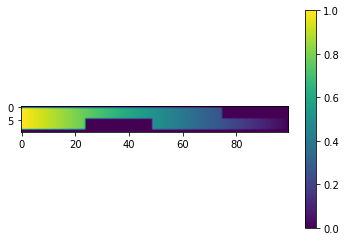

In [ ]:
gradiente = gradiente_descendente_con_relajacion(matrizA, matrizb,600,relajacion)
rellenarMatriz(malla, gradiente)
pintarMatriz(malla)

# SOLUCION DEL SISTEMA NO LINEAL

# MATRIZ DE FUNCIONES NO LINEALES Y JACOBIANA

In [ ]:
# SISTEMA DE ECUACIONES NO LINEAL
#Matriz de funciones 
def matrizFunciones(malla, vectorInicial):

  diccionarioIncognitas= dictIncognitas(malla)
  diccionarioFronteras= dictCondicionesFrontera(malla)
  matrizSolucionNoLineal= np.zeros((contarIncognitas(malla)))

  centro=0
  arriba=0
  abajo=0
  izquierda=0
  derecha=0

  for i in range(malla.shape[0]):
    for j in range(malla.shape[1]):

      llave= "a"+ str(i) + "." + str(j)
      
      if llave in diccionarioIncognitas:
        #Determinar Centro
        centro= vectorInicial[diccionarioIncognitas[llave]]
        
        #Determinar Derecha
        llaveDerecha="a"+ str(i) + "." + str(j+1)
        if llaveDerecha in diccionarioIncognitas:
                    ecuacionDerecha= diccionarioIncognitas[llaveDerecha]
                    derecha= vectorInicial[ecuacionDerecha]

        else:
                    derecha = -malla[i,j+1]

    
        #Determinar Izquierda
        llaveIzquierda="a"+ str(i) + "." + str(j-1)
        if llaveIzquierda in diccionarioIncognitas:
                    ecuacionIzquierda= diccionarioIncognitas[llaveIzquierda]
                    izquierda= vectorInicial[ecuacionIzquierda]

        else:
                    izquierda = -malla[i,j-1]


        #Detemrinar Abajo 
        llaveAbajo="a"+ str(i+1) + "." + str(j)
        if  llaveAbajo in diccionarioIncognitas:
          ecuacionAbajo=diccionarioIncognitas[llaveAbajo]
          abajo=vectorInicial[ecuacionAbajo]
        else:
                    abajo = -malla[i+1,j]

        #Determinar Arriba 
        llaveArriva = i
        if (i-1 >= 0):
          llaveArriba="a"+ str(i-1) + "." + str(j)
        else:
          llaveArriba="a"+ str(0) + "." + str(j)
        if  llaveArriba in diccionarioIncognitas:
          ecuacionArriba=diccionarioIncognitas[llaveArriba]
          arriba=vectorInicial[ecuacionArriba]
        else:
                    arriba= -malla[i-1,j]  

        #Ecuación general
        valorIncognita= centro - (0.25*derecha) +(0.125*derecha*centro) - (0.25*izquierda) - (0.125*izquierda*centro) - (0.25*abajo) -(0.25*arriba) +0.125
        matrizSolucionNoLineal[diccionarioIncognitas[llave]] = valorIncognita

  return matrizSolucionNoLineal
print("-------------------VECTOR---------------------")
print(crearVector(malla))
print("-------------------MATRIZ------------------")
print(matrizFunciones(malla,crearVector(malla)))

-------------------VECTOR---------------------
[0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58
 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45 0.44
 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31 0.3
 0.29 0.28 0.27 0.26 0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9
 0.89 0.88 0.87 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76
 0.75 0.74 0.73 0.72 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62
 0.61 0.6  0.59 0.58 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48
 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34
 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.99 0.98 0.97 0.96 0.95 0.94
 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86 0.85 0.84 0.83 0.82 0.81 0.8
 0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72 0.71 0.7  0.69 0.68 0.67 0.66
 0.65 0.64 0.63 0.62 0.61 0.6  0.

In [ ]:
#Matriz de funciones 
def matrizFuncionesW(malla, vectorInicial):

  diccionarioIncognitas= dictIncognitas(malla)
  diccionarioFronteras= dictCondicionesFrontera(malla)
  diccionarioIncognitasW = dictIncognitasW(malla)
  matrizSolucionNoLineal= np.zeros((contarIncognitas(malla)))

  centro=0
  arriba=0
  abajo=0
  izquierda=0
  derecha=0

  for i in range(malla.shape[0]):
    for j in range(malla.shape[1]):

      llave= "a"+ str(i) + "." + str(j)
      
      if llave in diccionarioIncognitasW:
        #Determinar Centro
        centro= vectorInicial[diccionarioIncognitas[llave]]
        
        #Determinar Derecha
        llaveDerecha="a"+ str(i) + "." + str(j+1)
        if llaveDerecha in diccionarioIncognitas:
                    ecuacionDerecha= diccionarioIncognitas[llaveDerecha]
                    derecha= vectorInicial[ecuacionDerecha]

        else:
                    derecha = 0
    
        #Determinar Izquierda
        llaveIzquierda="a"+ str(i) + "." + str(j-1)
        if llaveIzquierda in diccionarioIncognitas:
                    ecuacionIzquierda= diccionarioIncognitas[llaveIzquierda]
                    izquierda= vectorInicial[ecuacionIzquierda]

        else:
                    izquierda = 0

        #Detemrinar Abajo 
        llaveAbajo="a"+ str(i+1) + "." + str(j)
        if  llaveAbajo in diccionarioIncognitas:
          ecuacionAbajo=diccionarioIncognitas[llaveAbajo]
          abajo=vectorInicial[ecuacionAbajo]
        else:
                    abajo = 0

        #Determinar Arriba 
        llaveArriva = i
        if (i-1 >= 0):
          llaveArriba="a"+ str(i-1) + "." + str(j)
        else:
          llaveArriba="a"+ str(0) + "." + str(j)
        #llaveArriba="a"+ str(i-1) + "." + str(j)
        if  llaveArriba in diccionarioIncognitas:
          ecuacionArriba=diccionarioIncognitas[llaveArriba]
          arriba=vectorInicial[ecuacionArriba]
        else:
                    arriba= 0

        #ecuacion general
        valorIncognita = 0
        if  llave in diccionarioIncognitasW["back"]:
          print("DERECHA:", derecha)
          valorIncognita = (-2 *  (derecha - centro)) 
          valorIncognita = -0.25
        if  llave in diccionarioIncognitasW["front"]:
          valorIncognita = (-2 * (izquierda - centro)) 
          valorIncognita = -0.25
        if  llave in diccionarioIncognitasW["top"]:
          valorIncognita = (-2 * (arriba - centro)) 
          valorIncognita = -0.25
        if  llave in diccionarioIncognitasW["bottom"]:
          valorIncognita = (-2 * (abajo - centro)) 
          valorIncognita = -0.25

        matrizSolucionNoLineal[diccionarioIncognitas[llave]] = valorIncognita

  return matrizSolucionNoLineal

print("----------------------VECTOR-----------------")
print(crearVector(malla))
print("----------------------MATRIZ-----------------")
print(matrizFuncionesW(malla,crearVector(malla)))

----------------------VECTOR-----------------
[0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86
 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72
 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59 0.58
 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45 0.44
 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31 0.3
 0.29 0.28 0.27 0.26 0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9
 0.89 0.88 0.87 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76
 0.75 0.74 0.73 0.72 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62
 0.61 0.6  0.59 0.58 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48
 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34
 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.99 0.98 0.97 0.96 0.95 0.94
 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.86 0.85 0.84 0.83 0.82 0.81 0.8
 0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.72 0.71 0.7  0.69 0.68 0.67 0.66
 0.65 0.64 0.63 0.62 0.61 0.6  0.5

[[ 1.      -0.12625  0.      ...  0.       0.       0.     ]
 [-0.3725   1.      -0.1275  ...  0.       0.       0.     ]
 [ 0.      -0.37125  1.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  1.      -0.245    0.     ]
 [ 0.       0.       0.      ... -0.25375  1.      -0.24625]
 [ 0.       0.       0.      ...  0.      -0.2525   1.     ]]


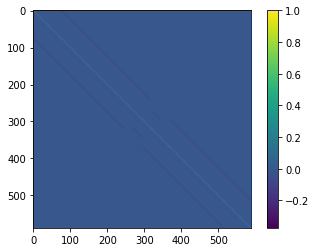

In [ ]:
#Jacobiana
def matrizJacobiana(malla, vectorInicial, vectorInicialW):
  diccionarioIncognitas= dictIncognitas(malla)
  diccionarioFronteras= dictCondicionesFrontera(malla)
  matrizJacobianaS= np.zeros((contarIncognitas(malla),contarIncognitas(malla)))
  contadorFilas=0

      
  izquierda = 0
  derecha = 0
  arriba= 0
  abajo = 0

  for i in range(malla.shape[0]):
    for j in range(malla.shape[1]):
      
      llave= "a"+ str(i) + "." + str(j)
      if llave not in diccionarioFronteras:

        #Determinar Derecha
        llaveDerecha="a"+ str(i) + "." + str(j+1)
        if llaveDerecha in diccionarioIncognitas:
          derecha= diccionarioIncognitas[llaveDerecha]
          matrizJacobianaS[contadorFilas][diccionarioIncognitas[llaveDerecha]]= -0.25 + (0.125*vectorInicial[diccionarioIncognitas[llave]])

        #Determinar Izquierda
        llaveIzquierda="a"+ str(i) + "." + str(j-1)
        if llaveIzquierda in diccionarioIncognitas:
          izquierda= diccionarioIncognitas[llaveIzquierda]
          matrizJacobianaS[contadorFilas][diccionarioIncognitas[llaveIzquierda]]= -0.25 - (0.125*vectorInicial[diccionarioIncognitas[llave]])

        #Determinar Abajo
        llaveAbajo="a"+ str(i+1) + "." + str(j)
        if llaveAbajo in diccionarioIncognitas:
          abajo= diccionarioIncognitas[llaveAbajo]
          matrizJacobianaS[contadorFilas][diccionarioIncognitas[llaveAbajo]]= -0.25  
          #matrizJacobianaS[contadorFilas][diccionarioIncognitas[llaveAbajo]]= -0.25  - (0.125*vectorInicialW[diccionarioIncognitas[llave]])

        #Determinar arriba
        llaveArriba="a"+ str(i-1) + "." + str(j)
        if llaveArriba in diccionarioIncognitas:
          arriba= diccionarioIncognitas[llaveArriba]
          matrizJacobianaS[contadorFilas][diccionarioIncognitas[llaveArriba]]= -0.25
          #matrizJacobianaS[contadorFilas][diccionarioIncognitas[llaveArriba]]= -0.25 + (0.125*vectorInicialW[diccionarioIncognitas[llave]])
          
          
        #DeterminarCentro
        matrizJacobianaS[diccionarioIncognitas[llave]][diccionarioIncognitas[llave]] = 1


        contadorFilas+=1

  return matrizJacobianaS



jacob = matrizJacobiana(malla,crearVector(malla), crearVectorW(malla))
print(jacob)
#print(len(jacob))
plt.imshow(jacob)
plt.colorbar()
plt.show()

#una= np.tril(jacob)
#print(np.linalg.inv(una))


# NEWTON RHAPSON, NO LINEALES

In [ ]:
def newton_raphson(malla, vectorInicial, vectorInicialW, iteraciones, type):
    solucion = vectorInicial

    H=vectorInicial
    matrizFuncionesNolineales = 0
    matrizJacobianaN = 0

    for i in range(iteraciones):

        if type == "u":
          matrizFuncionesNolineales = matrizFunciones(malla,vectorInicial)
          matrizJacobianaN = matrizJacobiana(malla,vectorInicial, vectorInicialW)
        else:
          matrizFuncionesNolineales = matrizFuncionesW(malla,vectorInicial)
          matrizJacobianaN = matrizJacobiana(malla,vectorInicial, vectorInicialW)
        
        #JACOBI CHO
        #H = jacobiCho(matrizJacobianaN, -(matrizFuncionesNolineales), relajacion, 10)
        
        #GAUSS CHO
        H = gaussChoRelajacion(matrizJacobianaN, -(matrizFuncionesNolineales), 10, relajacion,type)

        #RICHARDSON CHO
        #H = richardsonCho(matrizJacobianaN, -(matrizFuncionesNolineales), relajacion, 10)

        #GRADIENTE DESCENDIENTE
        #H = gradiente_descendente_con_relajacion(matrizJacobianaN, -(matrizFuncionesNolineales), 5, relajacion)

        xold = np.copy(solucion)
        solucion += H
        diff=np.absolute(np.linalg.norm(solucion)-np.linalg.norm(xold))
        print("[NEWTON] NORMA:",diff)
        if(diff <= toler):
            print("[NEWTON] CONVERGE en la iteraciÓN:",i)  
            break;

    solucion = abs(solucion)

    maxValue = np.amax(solucion)
    for i in range(0, len(solucion)):
      solucion[i] = solucion[i] / maxValue

    return abs(solucion)

[SEIDEL CHO] NORMA 8.161116478752533
[SEIDEL CHO] NORMA -3.017061475375722
[SEIDEL CHO] El método converge en la iteración:  1
[NEWTON] NORMA: 0.5152062047344224
[SEIDEL CHO] NORMA 8.27570914331598
[SEIDEL CHO] NORMA -3.055798247782713
[SEIDEL CHO] El método converge en la iteración:  1
[NEWTON] NORMA: 0.28373969179250125
[SEIDEL CHO] NORMA 8.336090200572354
[SEIDEL CHO] NORMA -3.0861709473162007
[SEIDEL CHO] El método converge en la iteración:  1
[NEWTON] NORMA: 0.1309858684982803
[SEIDEL CHO] NORMA 8.363764630693835
[SEIDEL CHO] NORMA -3.1017700019283048
[SEIDEL CHO] El método converge en la iteración:  1
[NEWTON] NORMA: 0.054171414375339566
[SEIDEL CHO] NORMA 8.375122582393642
[SEIDEL CHO] NORMA -3.1086339518540127
[SEIDEL CHO] El método converge en la iteración:  1
[NEWTON] NORMA: 0.021472939202240582
[SEIDEL CHO] NORMA 8.37973422411154
[SEIDEL CHO] NORMA -3.1115156921646587
[SEIDEL CHO] El método converge en la iteración:  1
[NEWTON] NORMA: 0.008253916275174689
[NEWTON] CONVERGE e

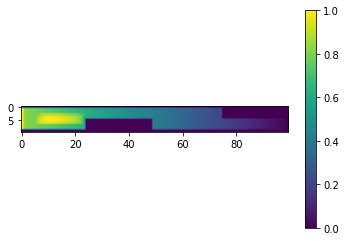

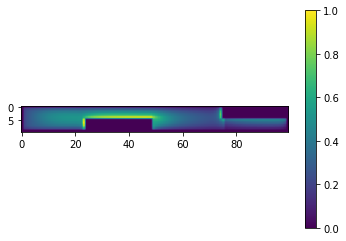

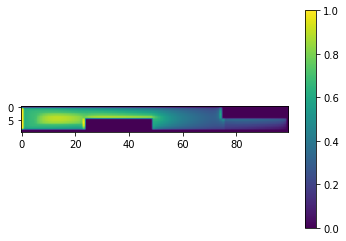

In [ ]:
# U MESH
sol_newton_u=newton_raphson(malla,crearVector(malla), crearVectorW(malla), 100, "u")
defMatrizU=rellenarMatriz(malla,sol_newton_u)

# W MESH 
sol_newton_w=newton_raphson(malla,crearVector(malla), crearVectorW(defMatrizU), 7,"w")
defMatrizW=rellenarMatriz(w,sol_newton_w)

# Z MESH
defMatrizZ = np.zeros((xmax, ymax))

# Adjust W
if ymax >= 100:
  for i in range(0, xmax):
    for j in range(0, ymax):
      if(j>=inicio2):
        defMatrizW[i][j] = defMatrizW[i][j]/2

fronteras = dictCondicionesFrontera(malla)


pintarMatriz(defMatrizU)
pintarMatriz(defMatrizW)

for i in range(malla.shape[0]):
  for j in range(malla.shape[1]):
    defMatrizZ[i][j] += defMatrizU[i][j] +  defMatrizW[i][j]

maxValue = np.amax(defMatrizZ)
for k in range(defMatrizZ.shape[0]):
  for l in range(defMatrizZ.shape[1]):
    llave= "a"+ str(k) + "." + str(l)
    if llave not in fronteras:
      defMatrizZ[k][l] = defMatrizZ[k][l] / maxValue

pintarMatriz(defMatrizZ)



# SPLINE INTERPOLATION

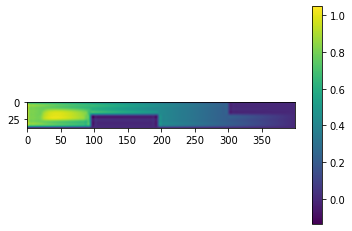

In [ ]:
import seaborn as sns 
from scipy import interpolate
import scipy as sp
import matplotlib.pyplot as plt

import pandas as pd

X= np.linspace(0,xmax-1, xmax)
Y= np.linspace(0,ymax-1, ymax)

x,y = np.meshgrid(X,Y)

f= interpolate.interp2d(X,Y,malla.T, kind='cubic')

x_new= np.linspace(0,xmax-1, xmax*4)
y_new= np.linspace(0,ymax-1, ymax*4)
prueba_spline= f(x_new, y_new)


x_new, y_new= np.meshgrid(x_new, y_new)

plt.imshow(prueba_spline.T)
plt.colorbar()
plt.show()

# 3D GRAPH

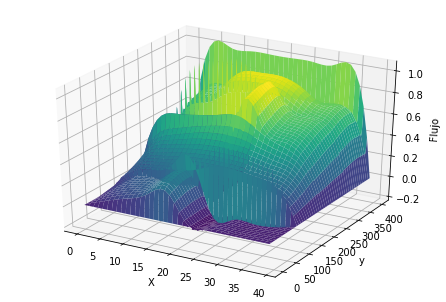

In [ ]:
import seaborn as sns
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy import interpolate
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

X = np.linspace(0,xmax-1, xmax)
Y = np.linspace(0,ymax-1, ymax)

x,y = np.meshgrid(X,Y)

rotatedZ = np.rot90(defMatrizZ, k=1, axes=(0, 1))
rotatedZ = np.rot90(rotatedZ, k=1, axes=(0, 1))

f = interpolate.interp2d(X,Y,rotatedZ.T, kind='cubic')

x_n = np.linspace(0,xmax-1, xmax*4)
y_n = np.linspace(0,ymax-1, ymax*4)

spline = f(x_n,y_n)

x = range(0, xmax*4)
y = range(0, ymax*4)

xmesh, ymesh = p.meshgrid(x,y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xmesh, ymesh, spline, cmap="viridis")
ax.set_xlabel( 'X' )
ax.set_ylabel( 'y' )
ax.set_zlabel('Flujo')

plt.show()
